# Introduction

Three groups: microsatellite instability high (MSI-H), microsatellite instability low (MSI-L) and microsatellite stable (MSS).

Two sets of measurements: 7_marker, 5_marker. The original report consider one sample as MSI if both indicate positive.

In [11]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

mpl.rcParams['figure.dpi'] = 600

In [4]:
cancer_types = ['UCEC', 'COAD', 'STAD']

In [5]:
df = pd.read_excel("41591_2016_BFnm4191_MOESM27_ESM.xlsx", index=1)
df

,Sample Name,Average difference in microsatellite alleles relative to paired normal,Number Unstable Loci,Number Loci Called,Proportion Unstable Loci,Stability at chr8:7679723-7679741,MOSAIC classification,Tumor Type,MSI-PCR Result,In Training Set?
0,TCGA-GV-A6ZA,-0.000393,510,144859,0.003521,stable,MSS,BLCA,NaN,no
1,TCGA-H4-A2HO,0.001674,1203,244912,0.004912,stable,MSS,BLCA,NaN,no
2,TCGA-H4-A2HQ,0.000091,915,230733,0.003966,stable,MSS,BLCA,NaN,no
3,TCGA-HQ-A2OE,0.000061,526,165003,0.003188,stable,MSS,BLCA,NaN,no
4,TCGA-HQ-A2OF,0.000605,407,128967,0.003156,stable,MSS,BLCA,NaN,no
...,...,...,...,...,...,...,...,...,...,...
5925,TCGA-QS-A8F1,-0.000477,1316,226304,0.005815,stable,MSS,UCEC,ND,no
5926,TCGA-SJ-A6ZI,0.008849,3363,298901,0.011251,unstable,MSI-H,UCEC,ND,no
5927,TCGA-SJ-A6ZJ,0.002213,1610,239070,0.006734,stable,MSS,UCEC,ND,no
5928,TCGA-SL-A6J9,-0.000376,1023,194265,0.005266,stable,MSS,UCEC,ND,no


In [6]:
data = pd.read_csv("TCGA.Kallisto.fullIDs.cibersort.relative.tsv", sep="\t")
data["SampleID"] = data["SampleID"].apply(lambda x: x.replace('.', '-'))
data["PatientID"] = data["SampleID"].apply(lambda x: '-'.join(x.split('-')[0:3]))

In [7]:
merged = data.merge(df, left_on="PatientID", right_on='Sample Name')

In [12]:
sample_size = pd.crosstab(merged["CancerType"], merged["MOSAIC classification"])
sample_size

MOSAIC classification,MSI-H,MSS
CancerType,,
BLCA,1,269
BRCA,0,290
COAD,78,291
GBM,1,133
HNSC,3,541
KIRC,8,324
KIRP,0,228
LGG,1,530
LIHC,2,380


In [14]:
tcga_study_abbr_dict = {
    "LAML": "Acute Myeloid Leukemia",
    "ACC": "Adrenocortical carcinoma",
    "BLCA": "Bladder Urothelial Carcinoma",
    "LGG": "Brain Lower Grade Glioma",
    "BRCA": "Breast invasive carcinoma",
    "CESC": "Cervical squamous cell carcinoma and endocervical adenocarcinoma",
    "CHOL": "Cholangiocarcinoma",
    "LCML": "Chronic Myelogenous Leukemia",
    "COAD": "Colon adenocarcinoma",
    "CNTL": "Controls",
    "ESCA": "Esophageal carcinoma",
    "FPPP": "FFPE Pilot Phase II",
    "GBM": "Glioblastoma multiforme",
    "HNSC": "Head and Neck squamous cell carcinoma",
    "KICH": "Kidney Chromophobe",
    "KIRC": "Kidney renal clear cell carcinoma",
    "KIRP": "Kidney renal papillary cell carcinoma",
    "LIHC": "Liver hepatocellular carcinoma",
    "LUAD": "Lung adenocarcinoma",
    "LUSC": "Lung squamous cell carcinoma",
    "DLBC": "Lymphoid Neoplasm Diffuse Large B-cell Lymphoma",
    "MESO": "Mesothelioma",
    "MISC": "Miscellaneous",
    "OV": "Ovarian serous cystadenocarcinoma",
    "PAAD": "Pancreatic adenocarcinoma",
    "PCPG": "Pheochromocytoma and Paraganglioma",
    "PRAD": "Prostate adenocarcinoma",
    "READ": "Rectum adenocarcinoma",
    "SARC": "Sarcoma",
    "SKCM": "Skin Cutaneous Melanoma",
    "STAD": "Stomach adenocarcinoma",
    "TGCT": "Testicular Germ Cell Tumors",
    "THYM": "Thymoma",
    "THCA": "Thyroid carcinoma",
    "UCS": "Uterine Carcinosarcoma",
    "UCEC": "Uterine Corpus Endometrial Carcinoma",
    "UVM": "Uveal Melanoma"
}

tcga_study_abbr_dict2 = {k: v + ' (' + k + ')' for k, v in tcga_study_abbr_dict.items()}
tcga_study_abbr_dict2

{'LAML': 'Acute Myeloid Leukemia (LAML)',
 'ACC': 'Adrenocortical carcinoma (ACC)',
 'BLCA': 'Bladder Urothelial Carcinoma (BLCA)',
 'LGG': 'Brain Lower Grade Glioma (LGG)',
 'BRCA': 'Breast invasive carcinoma (BRCA)',
 'CESC': 'Cervical squamous cell carcinoma and endocervical adenocarcinoma (CESC)',
 'CHOL': 'Cholangiocarcinoma (CHOL)',
 'LCML': 'Chronic Myelogenous Leukemia (LCML)',
 'COAD': 'Colon adenocarcinoma (COAD)',
 'CNTL': 'Controls (CNTL)',
 'ESCA': 'Esophageal carcinoma (ESCA)',
 'FPPP': 'FFPE Pilot Phase II (FPPP)',
 'GBM': 'Glioblastoma multiforme (GBM)',
 'HNSC': 'Head and Neck squamous cell carcinoma (HNSC)',
 'KICH': 'Kidney Chromophobe (KICH)',
 'KIRC': 'Kidney renal clear cell carcinoma (KIRC)',
 'KIRP': 'Kidney renal papillary cell carcinoma (KIRP)',
 'LIHC': 'Liver hepatocellular carcinoma (LIHC)',
 'LUAD': 'Lung adenocarcinoma (LUAD)',
 'LUSC': 'Lung squamous cell carcinoma (LUSC)',
 'DLBC': 'Lymphoid Neoplasm Diffuse Large B-cell Lymphoma (DLBC)',
 'MESO': 'Meso

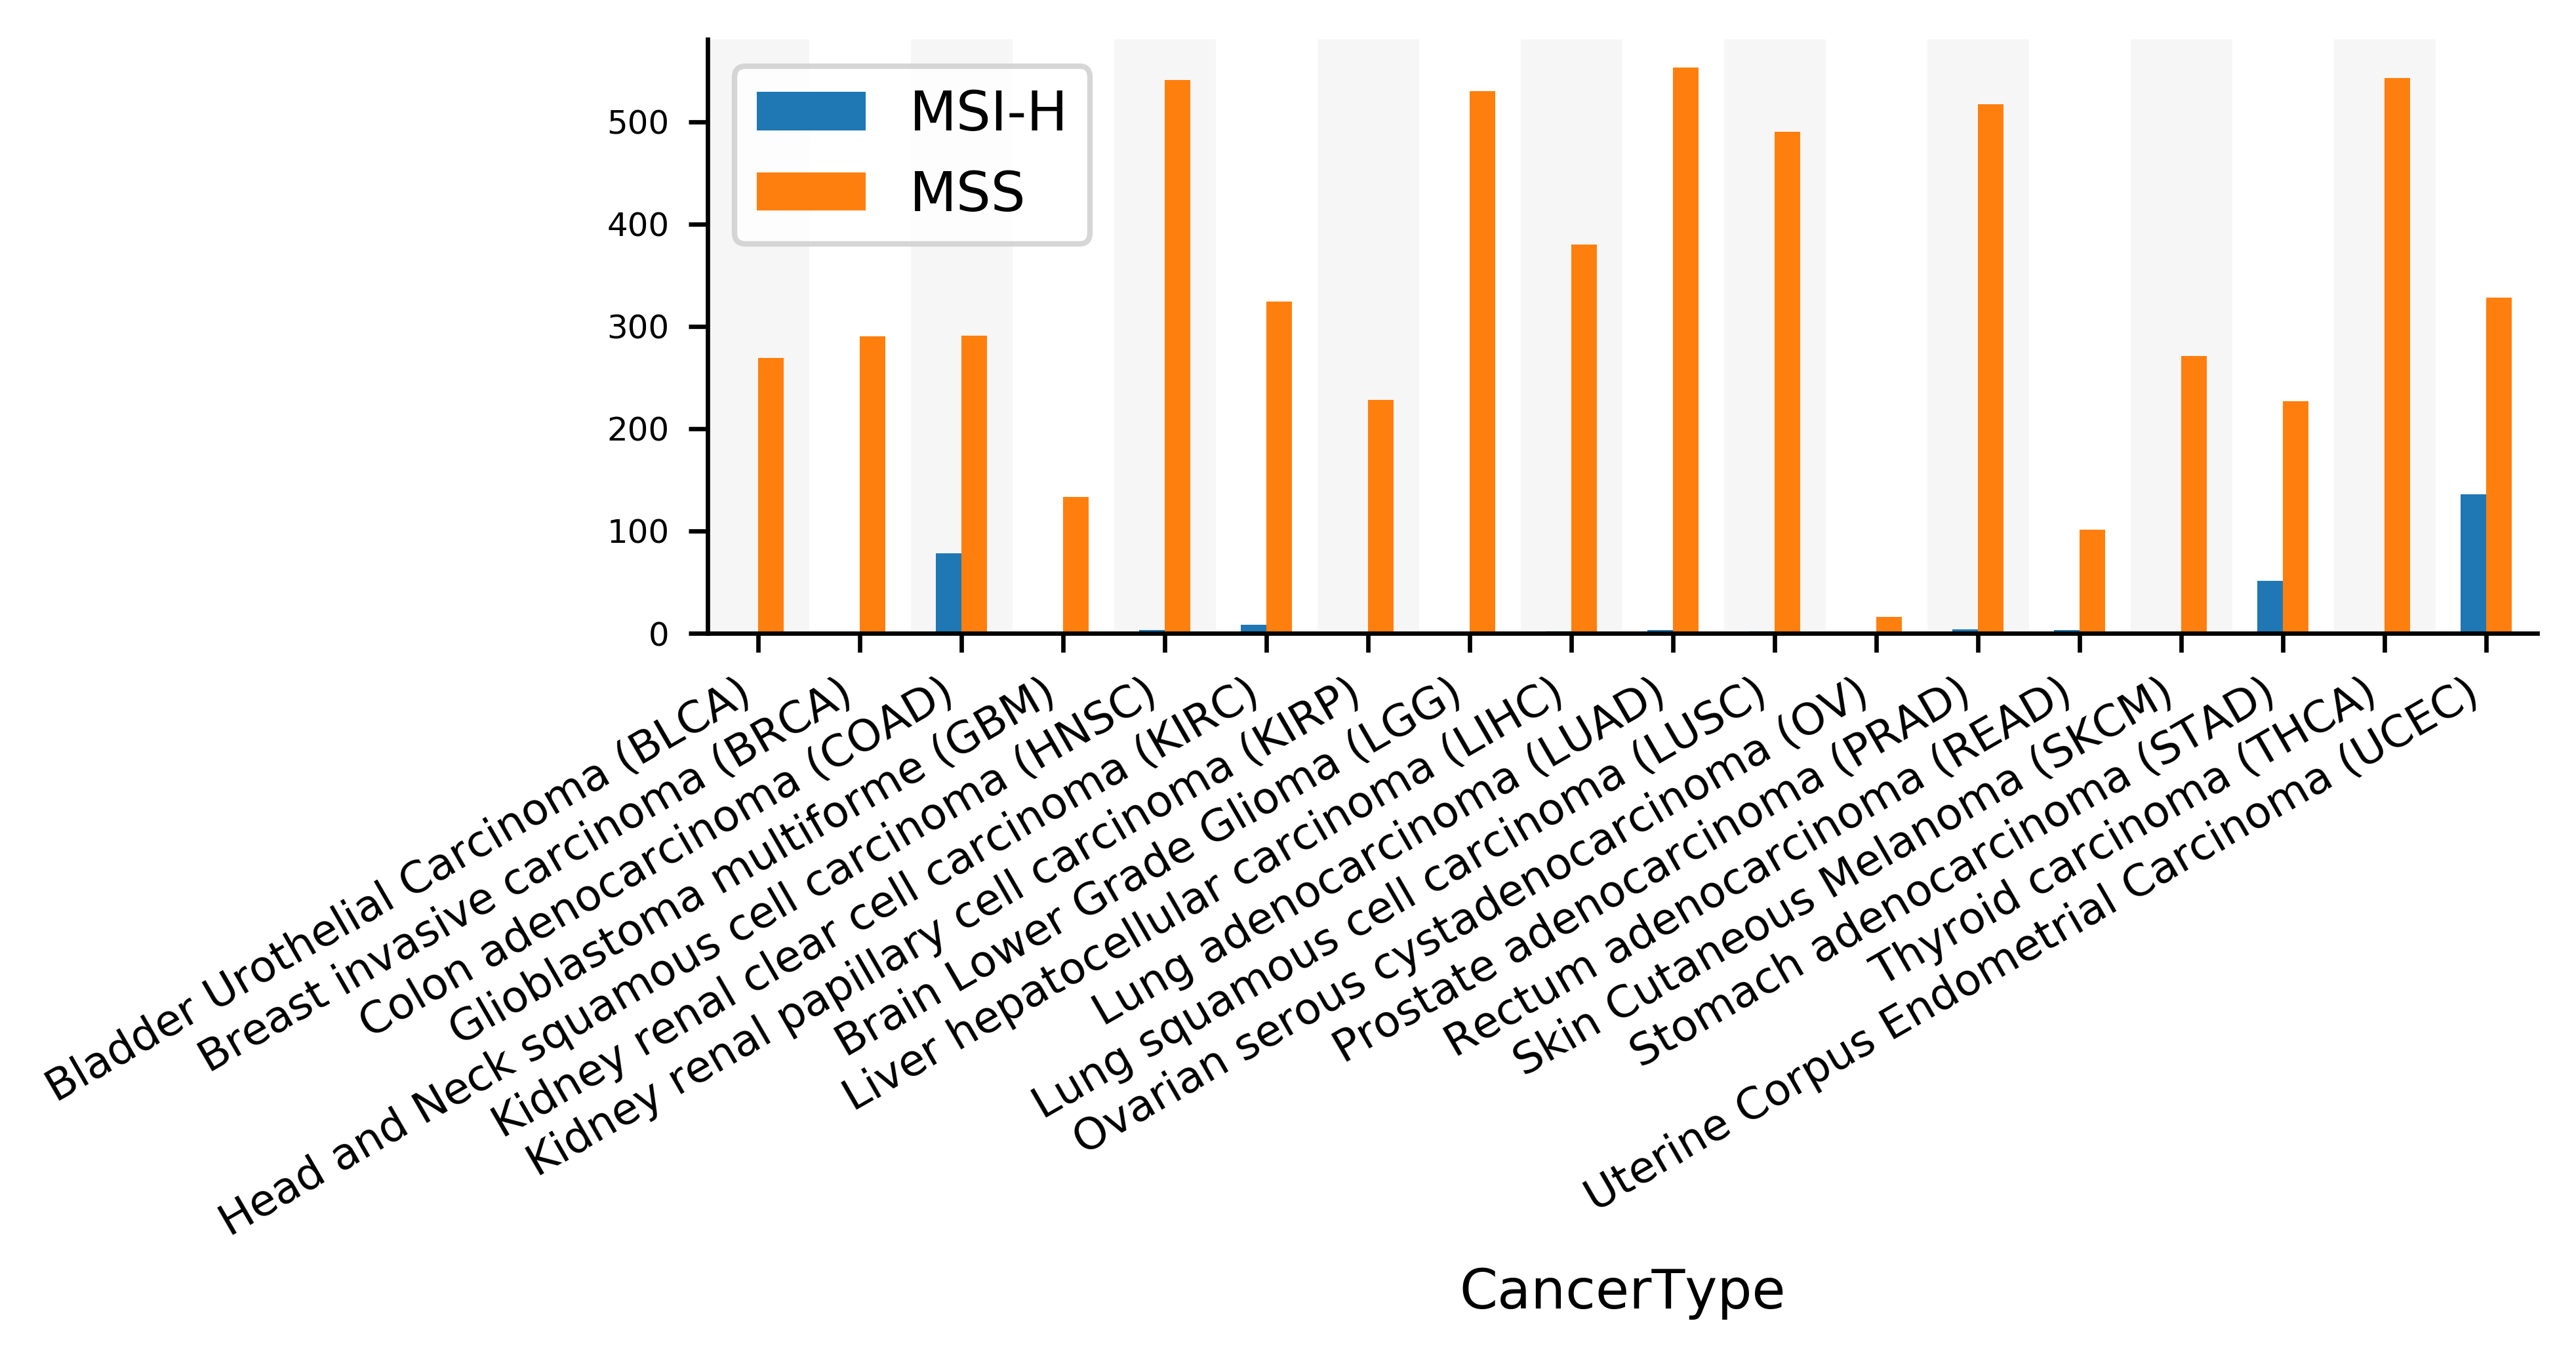

In [36]:
temp = sample_size.copy()
temp.index = temp.index.to_series().apply(tcga_study_abbr_dict2.__getitem__)
ax = temp.plot(kind='bar', figsize=(6, 2))

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.tick_params(axis="y", labelsize=6)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=8)

current_ylim = ax.get_ylim()

for i in range(len(temp)):
    if i % 2 == 0:
        ax.fill_between([i - 0.5, i + 0.5], current_ylim[0], current_ylim[1], facecolor='lightgray', alpha=0.2)
        
ax.set_ylim(current_ylim)

ax.legend().set_title('')

In [20]:
cell_types = ['B.cells.naive', 'B.cells.memory', 'Plasma.cells', 'T.cells.CD8',
       'T.cells.CD4.naive', 'T.cells.CD4.memory.resting',
       'T.cells.CD4.memory.activated', 'T.cells.follicular.helper',
       'T.cells.regulatory..Tregs.', 'T.cells.gamma.delta', 'NK.cells.resting',
       'NK.cells.activated', 'Monocytes', 'Macrophages.M0', 'Macrophages.M1',
       'Macrophages.M2', 'Dendritic.cells.resting',
       'Dendritic.cells.activated', 'Mast.cells.resting',
       'Mast.cells.activated', 'Eosinophils', 'Neutrophils']

#merged['Leukocytes.all'] = merged[cell_types].sum(1)

merged['T.cells.all'] = merged[['T.cells.CD8',
                                    'T.cells.CD4.naive',
                                    'T.cells.CD4.memory.resting',
                                    'T.cells.CD4.memory.activated',
                                    'T.cells.follicular.helper',
                                    'T.cells.regulatory..Tregs.',
                                    'T.cells.gamma.delta']].sum(1)

merged['B.cells.all'] = merged[['B.cells.naive', 'B.cells.memory']].sum(1)

merged['Nk.cells.all'] = merged[['NK.cells.resting', 'NK.cells.activated']].sum(1)

merged['Macrophages.all'] = merged[['Macrophages.M0', 'Macrophages.M1', 'Macrophages.M2']].sum(1)

merged['Dendritic.cells.all'] = merged[['Dendritic.cells.resting', 'Dendritic.cells.activated']].sum(1)

merged['Mast.cells.all'] = merged[['Mast.cells.resting', 'Mast.cells.activated']].sum(1)



augmented_cell_types = cell_types + ['T.cells.all', 'B.cells.all', 'Nk.cells.all', 'Macrophages.all', 
                                     'Dendritic.cells.all', 'Mast.cells.all']

merged

,SampleID,CancerType,B.cells.naive,B.cells.memory,Plasma.cells,T.cells.CD8,T.cells.CD4.naive,T.cells.CD4.memory.resting,T.cells.CD4.memory.activated,T.cells.follicular.helper,...,MOSAIC classification,Tumor Type,MSI-PCR Result,In Training Set?,T.cells.all,B.cells.all,Nk.cells.all,Macrophages.all,Dendritic.cells.all,Mast.cells.all
0,TCGA-FD-A5C0-01A-11R-A28M-07,BLCA,0.014046,0.068210,0.023038,0.158945,0.0,0.000000,0.000000,0.070793,...,MSS,BLCA,NaN,no,0.242919,0.082256,0.025737,0.366385,0.042889,0.118447
1,TCGA-FD-A5C1-01A-11R-A28M-07,BLCA,0.011291,0.002272,0.044114,0.157584,0.0,0.065190,0.019638,0.104205,...,MSS,BLCA,NaN,no,0.364805,0.013563,0.031628,0.395344,0.074288,0.044886
2,TCGA-K4-A5RI-01A-11R-A28M-07,BLCA,0.000000,0.018905,0.017071,0.005689,0.0,0.070439,0.000000,0.089084,...,MSS,BLCA,NaN,no,0.165212,0.018905,0.140058,0.188324,0.166539,0.232755
3,TCGA-K4-A5RI-11A-11R-A28M-07,BLCA,0.052533,0.007261,0.166612,0.111995,0.0,0.076024,0.000000,0.056363,...,MSS,BLCA,NaN,no,0.308455,0.059794,0.025353,0.252401,0.037649,0.075095
4,TCGA-FD-A5BZ-01A-11R-A28M-07,BLCA,0.004478,0.029914,0.063679,0.042591,0.0,0.000000,0.000000,0.046880,...,MSS,BLCA,NaN,no,0.126843,0.034391,0.019346,0.634590,0.001480,0.119670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6321,TCGA-4E-A92E-01A-11R-A37O-07,UCEC,0.046195,0.000000,0.030850,0.205641,0.0,0.063863,0.000000,0.178285,...,MSS,UCEC,ND,no,0.473637,0.046195,0.039144,0.363599,0.000000,0.029639
6322,TCGA-2E-A9G8-01A-11R-A40A-07,UCEC,0.000000,0.035739,0.111000,0.168203,0.0,0.000000,0.000000,0.197915,...,MSS,UCEC,ND,no,0.404185,0.035739,0.093531,0.198321,0.010964,0.111427
6323,TCGA-A5-AB3J-01A-11R-A40A-07,UCEC,0.229559,0.000000,0.143764,0.065165,0.0,0.178858,0.000000,0.055698,...,MSS,UCEC,ND,no,0.317685,0.229559,0.070916,0.195315,0.000960,0.038476
6324,TCGA-JU-AAVI-01A-11R-A40A-07,UCEC,0.021791,0.000000,0.054091,0.312219,0.0,0.000000,0.000000,0.260242,...,MSS,UCEC,ND,no,0.579214,0.021791,0.125063,0.214592,0.004145,0.001104


## Figures

[Text(0, 0, 'B.cells.naive'),
 Text(0, 0, 'B.cells.memory'),
 Text(0, 0, 'Plasma.cells'),
 Text(0, 0, 'T.cells.CD8'),
 Text(0, 0, 'T.cells.CD4.naive'),
 Text(0, 0, 'T.cells.CD4.memory.resting'),
 Text(0, 0, 'T.cells.CD4.memory.activated'),
 Text(0, 0, 'T.cells.follicular.helper'),
 Text(0, 0, 'T.cells.regulatory..Tregs.'),
 Text(0, 0, 'T.cells.gamma.delta'),
 Text(0, 0, 'NK.cells.resting'),
 Text(0, 0, 'NK.cells.activated'),
 Text(0, 0, 'Monocytes'),
 Text(0, 0, 'Macrophages.M0'),
 Text(0, 0, 'Macrophages.M1'),
 Text(0, 0, 'Macrophages.M2'),
 Text(0, 0, 'Dendritic.cells.resting'),
 Text(0, 0, 'Dendritic.cells.activated'),
 Text(0, 0, 'Mast.cells.resting'),
 Text(0, 0, 'Mast.cells.activated'),
 Text(0, 0, 'Eosinophils'),
 Text(0, 0, 'Neutrophils'),
 Text(0, 0, 'T.cells.all'),
 Text(0, 0, 'B.cells.all'),
 Text(0, 0, 'Nk.cells.all'),
 Text(0, 0, 'Macrophages.all'),
 Text(0, 0, 'Dendritic.cells.all'),
 Text(0, 0, 'Mast.cells.all')]

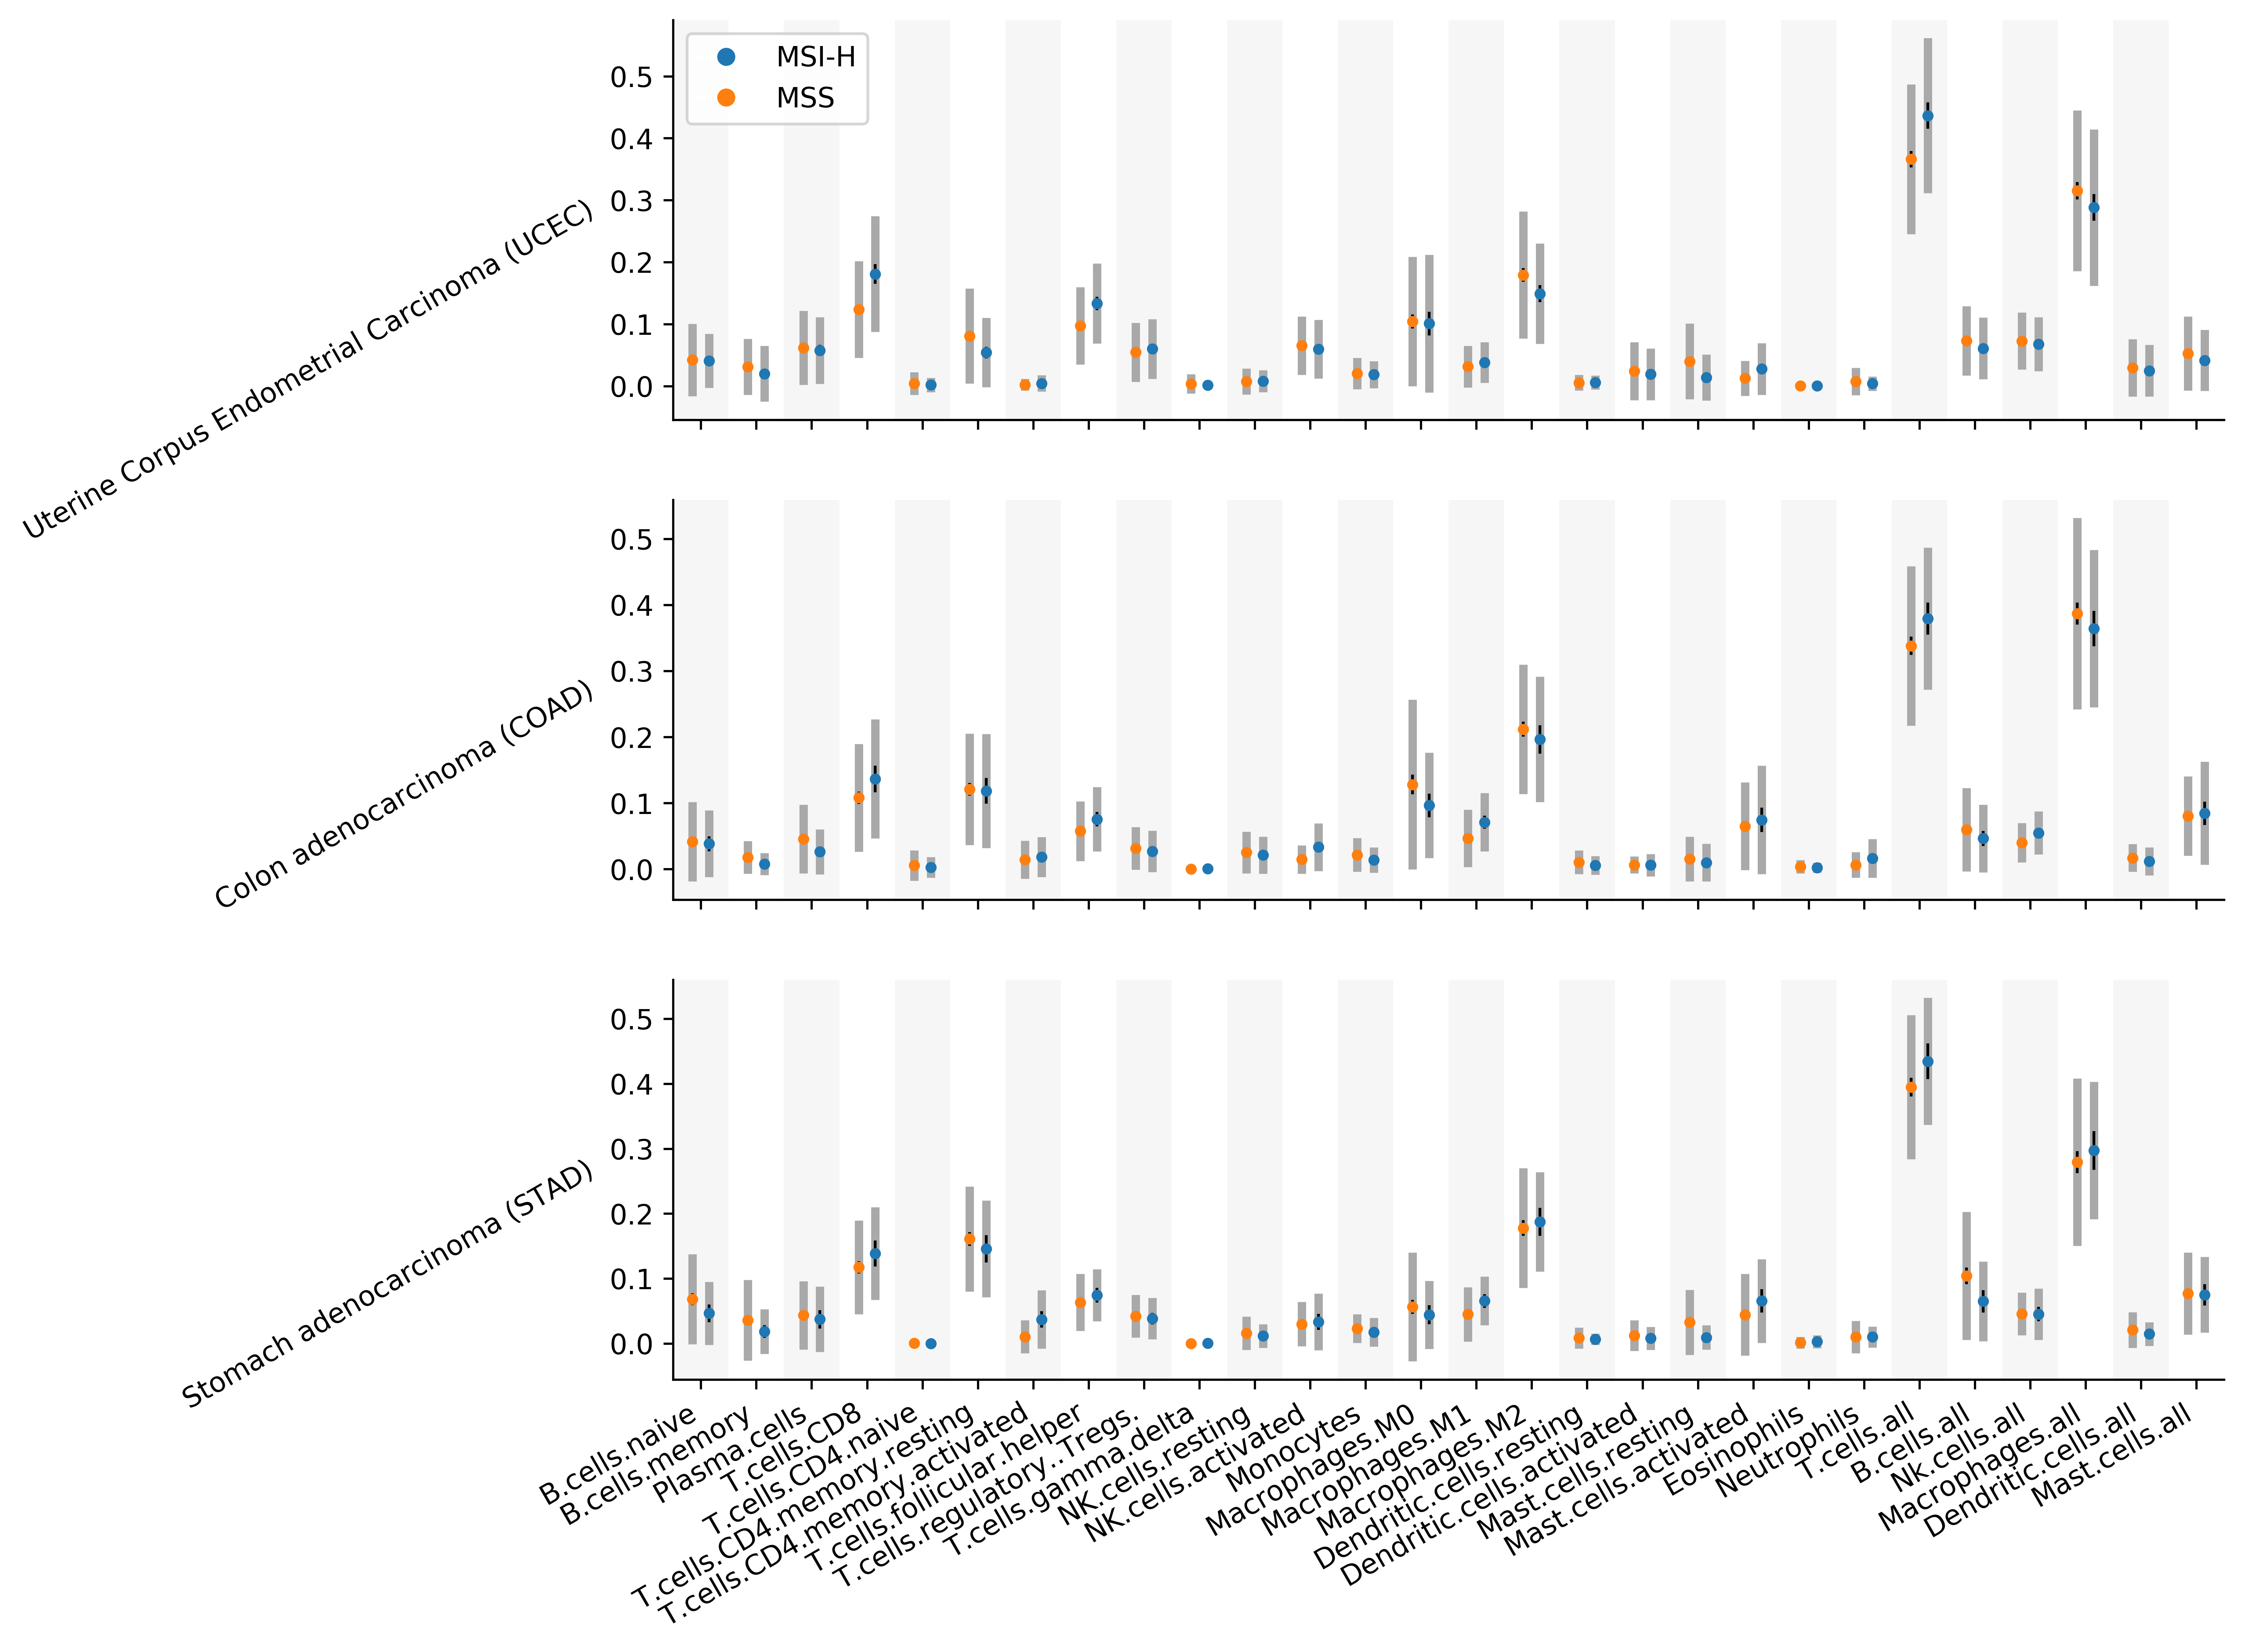

In [38]:
x_map = {v: i for i, v in enumerate(augmented_cell_types)}

offset_map = {
 'MSS': -0.15,
 'MSI-H': 0.15}

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

color_map = {'MSI-H': colors[0], 'MSS': colors[1]}

fig = plt.figure(figsize=(10, 3 * len(cancer_types)))

axes = []

a = 0.05

for cancer_type in cancer_types:
    if len(axes) == 0:
        ax = fig.add_subplot(len(cancer_types), 1, 1)
        legend_elements = [mpl.lines.Line2D([0], [0], marker='.', color='w', markerfacecolor=color_map[i], label=i, markersize=15) 
                   for i in color_map]
        ax.legend(handles=legend_elements, loc='upper left')
    else:
        ax = fig.add_subplot(len(cancer_types), 1, len(axes) + 1, sharex = axes[0])
        
    axes.append(ax)

    for satellite in ['MSI-H', 'MSS']:
        num_data = merged[(merged["CancerType"] == cancer_type) & (merged["MOSAIC classification"] == satellite)][augmented_cell_types]

        n = num_data.shape[0];
        mean = num_data.mean(axis=0)
        sd = num_data.std(ddof=1, axis=0)
        err = scipy.stats.t.ppf(1 - a / 2, n - 1) * sd / np.sqrt(n)

        x = [v + offset_map[satellite] for v in x_map.values()]

        ax.errorbar(x, mean, yerr=sd, fmt='.', color = color_map[satellite], ecolor = 'darkgray', elinewidth=3.0)
        ax.errorbar(x, mean, yerr=err, fmt="None", color = color_map[satellite], ecolor = 'black', elinewidth=1.0)

    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    current_ylim = ax.get_ylim()
    for v in x_map.values():
        if v % 2 == 0:
            ax.fill_between([v - 0.5, v + 0.5], current_ylim[0], current_ylim[1], facecolor='lightgray', alpha=0.2)

    ax.set_ylim(current_ylim)
    ax.set_xticks(list(x_map.values()))
    ax.tick_params(axis='x', which = 'both', labelbottom=None)
    ax.set_ylabel(tcga_study_abbr_dict2[cancer_type], rotation = 30, ha = 'right')
    ax.set_xlim(-0.5, len(x_map) - 0.5)
    
# Ticks
ax.tick_params(axis='x', which = 'both', labelbottom=True)
ax.set_xticks(list(x_map.values()))
ax.set_xticklabels(list(x_map.keys()), rotation=30, ha='right')



In [25]:
cancer_types

['UCEC', 'COAD', 'STAD']